FASE 1 : INTRODUCCION AL ANALISIS

World of warcraft es un MMORPG en el cual los jugadores pueden caracterizarse por razas y a la vez por clases. Puede personalizar su personaje para pelear contra otros jugadores o para realizar misiones del juego y subir de nivel de personaje o de honor con las distintas zonas. Cada una de estas zonas están diseñadas para conllevar distintos tipos de jugadores, desde los más novatos hasta los más avanzados en el juego. Este juego tiene muchos factores con los cuales se pueden generar diferentes análisis, ya sea, sobre la popularidad de las zonas, la media de jugadores por nivel, control de las zonas a lo largo del tiempo, cómo han cambiado las preferencias de zonas y actividades de los jugadores con diferentes versiones del juego, etc. 

Ahora, nuestro equipo, con el DataSet entregado decidió hacer un análisis exhaustivo el cual se centre en el ámbito de las zonas, más específicamente, el equipo responderá la interrogante de : ¿Existen zonas donde el nivel de los jugadores es más homogéneo en comparación con otras zonas?. Descubrir si hay zonas con una población de niveles más homogénea nos puede dar pistas sobre las preferencias de los jugadores y cómo eligen moverse por el mundo del juego. Esto puede estar influenciado por el diseño de las zonas, el tipo de contenido disponible y las recompensas que se pueden obtener. En esta primera fase de nuestro análisis CRISP-DM, vamos a sumergirnos en los datos para detectar cómo se distribuyen los niveles de los jugadores en diferentes zonas. Este análisis nos ayudará a encontrar patrones y a entender cómo la uniformidad de niveles varía de una zona a otra, lo cual puede ser crucial para futuras decisiones de diseño y ajuste dentro del juego.

FASE 2 : EXPLORACIÓN DE LOS DATOS

In [1]:
import pandas as pd
zones = pd.read_csv('../data/01_raw/zones.csv')
wowah_data = pd.read_csv('../data/01_raw/wowah_data.csv')
locations = pd.read_csv('../data/01_raw/locations.csv')


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:2                                                                                    │
│                                                                                                  │
│   1 import matplotlib.pyplot as plt                                                              │
│ ❱ 2 import seaborn as sns                                                                        │
│   3 import plotly.graph_objects as go                                                            │
│   4                                                                                              │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
ModuleNotFoundError: No module named 'seaborn'

In [72]:
# Eliminar espacios en blanco de los nombres de las columnas
wowah_data.columns = wowah_data.columns.str.strip()

In [73]:
zones.head(8)


,Zone_Name,Continent,Area,Zone,Subzone,Type,Size,Controlled,Min_req_level,Min_rec_level,Max_rec_level,Min_bot_level,Max_bot_level
0,Durotar,Kalimdor,Central Kalimdor,Durotar,NaN,Zone,NaN,Horde,1,1.0,10.0,1.0,10.0
1,The Barrens,Kalimdor,Central Kalimdor,The Barrens,NaN,Zone,NaN,Contested,1,10.0,35.0,10.0,35.0
2,Silverpine Forest,Eastern Kingdoms,Lordaeron,Silverpine Forest,NaN,Zone,NaN,Horde,1,10.0,20.0,10.0,20.0
3,Stonetalon Mountains,Kalimdor,Central Kalimdor,Stonetalon Mountains,NaN,Zone,NaN,Contested,1,25.0,30.0,25.0,30.0
4,Thunder Bluff,Kalimdor,Central Kalimdor,Thunder Bluff,NaN,City,NaN,Horde,1,1.0,100.0,1.0,100.0
5,Dustwallow Marsh,Kalimdor,Central Kalimdor,Dustwallow Marsh,NaN,Zone,NaN,Contested,1,35.0,40.0,35.0,40.0
6,Orgrimmar,Kalimdor,Central Kalimdor,Durotar,Orgrimmar,City,NaN,Horde,1,1.0,100.0,1.0,100.0
7,Undercity,Eastern Kingdoms,Lordaeron,Tirisfal Glades,Undercity,City,NaN,Horde,1,1.0,100.0,1.0,100.0


In [74]:
wowah_data.head(8)

,char,level,race,charclass,zone,guild,timestamp
0,59425,1,Orc,Rogue,Orgrimmar,165,01/01/08 00:02:04
1,65494,9,Orc,Hunter,Durotar,-1,01/01/08 00:02:04
2,65325,14,Orc,Warrior,Ghostlands,-1,01/01/08 00:02:04
3,65490,18,Orc,Hunter,Ghostlands,-1,01/01/08 00:02:04
4,2288,60,Orc,Hunter,Hellfire Peninsula,-1,01/01/08 00:02:09
5,2289,60,Orc,Hunter,Hellfire Peninsula,-1,01/01/08 00:02:09
6,61239,68,Orc,Hunter,Blade's Edge Mountains,243,01/01/08 00:02:14
7,59772,69,Orc,Warrior,Shadowmoon Valley,35,01/01/08 00:02:14


In [75]:
locations.head(8)

,Map_ID,Location_Type,Location_Name,Game_Version
0,0,Continent,Eastern Kingdoms,WoW
1,1,Continent,Kalimdor,WoW
2,530,Continent,Outlands,TBC
3,571,Continent,Northrend,WLK
4,646,Continent,Deepholm,CAT
5,732,Continent,Tol Barad,CAT
6,870,Continent,Pandaria,MoP
7,1064,Continent,Mogu Island Daily Area (Isle of Thunder),MoP


In [76]:
zones.dtypes


Zone_Name         object
Continent         object
Area              object
Zone              object
Subzone           object
Type              object
Size             float64
Controlled        object
Min_req_level      int64
Min_rec_level    float64
Max_rec_level    float64
Min_bot_level    float64
Max_bot_level    float64
dtype: object

In [77]:
wowah_data.dtypes


char          int64
level         int64
race         object
charclass    object
zone         object
guild         int64
timestamp    object
dtype: object

In [78]:
locations.dtypes


Map_ID            int64
Location_Type    object
Location_Name    object
Game_Version     object
dtype: object

In [79]:
zones.describe()

,Size,Min_req_level,Min_rec_level,Max_rec_level,Min_bot_level,Max_bot_level
count,68.000000,160.000000,159.000000,159.000000,158.000000,158.000000
mean,11.544118,22.975000,39.981132,61.918239,40.518987,61.974684
std,10.935952,29.272511,28.165980,27.350276,28.128622,26.861036
min,5.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,5.000000,1.000000,10.000000,42.000000,10.000000,40.750000
50%,5.000000,1.000000,45.000000,70.000000,46.000000,70.000000
75%,16.250000,57.250000,67.000000,80.000000,68.000000,80.000000
max,40.000000,80.000000,80.000000,100.000000,80.000000,100.000000


In [80]:
zones.describe().T

,count,mean,std,min,25%,50%,75%,max
Size,68.0,11.544118,10.935952,5.0,5.00,5.0,16.25,40.0
Min_req_level,160.0,22.975000,29.272511,1.0,1.00,1.0,57.25,80.0
Min_rec_level,159.0,39.981132,28.165980,0.0,10.00,45.0,67.00,80.0
Max_rec_level,159.0,61.918239,27.350276,0.0,42.00,70.0,80.00,100.0
Min_bot_level,158.0,40.518987,28.128622,1.0,10.00,46.0,68.00,80.0
Max_bot_level,158.0,61.974684,26.861036,0.0,40.75,70.0,80.00,100.0


In [81]:
zones.isna().sum()


Zone_Name          0
Continent          0
Area               3
Zone               7
Subzone          108
Type               0
Size              92
Controlled         0
Min_req_level      0
Min_rec_level      1
Max_rec_level      1
Min_bot_level      2
Max_bot_level      2
dtype: int64

In [82]:
filas, columnas = zones.shape
filas , columnas 

(160, 13)

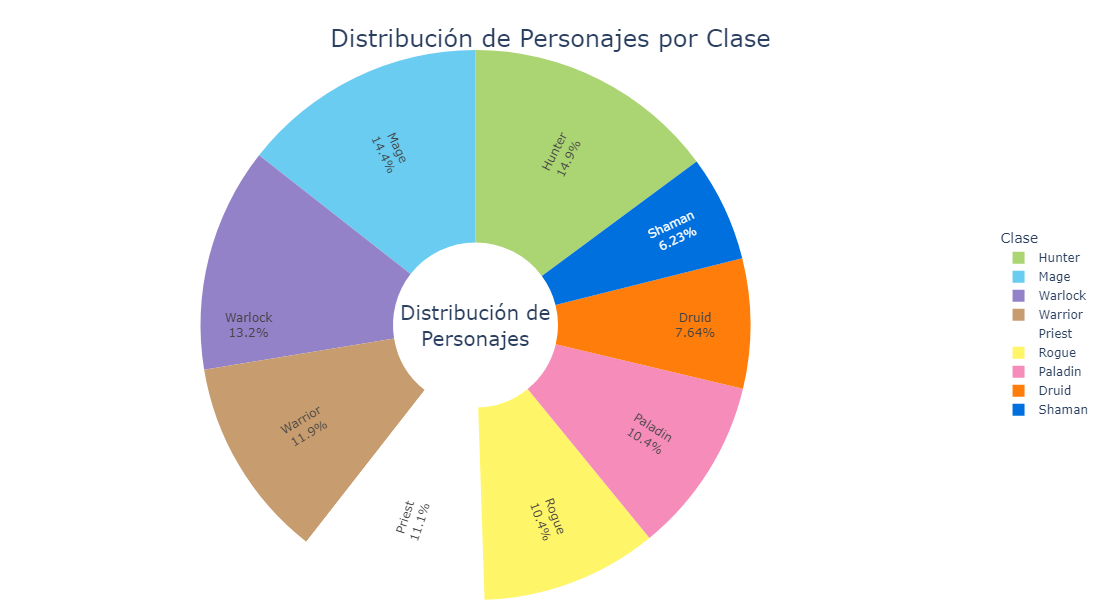

In [83]:
# Datos de las clases
class_counts = wowah_data['charclass'].value_counts()

# Colores para cada clase
colors = {
    'Druid': '#FF7D0A',   # Naranja
    'Hunter': '#ABD473',  # Verde
    'Mage': '#69CCF0',    # Azul claro
    'Paladin': '#F58CBA', # Rosa
    'Priest': '#FFFFFF',  # Blanco
    'Rogue': '#FFF569',   # Amarillo
    'Shaman': '#0070DE',  # Azul
    'Warlock': '#9482C9', # Morado
    'Warrior': '#C79C6E'  # Marrón claro
}

# Crear gráfico de torta
fig = go.Figure(data=[go.Pie(
    labels=class_counts.index,
    values=class_counts,
    marker=dict(
        colors=[colors.get(clase, '#000000') for clase in class_counts.index]
    ),
    textinfo='label+percent',
    insidetextorientation='radial',
    hole=0.3  # Crear un gráfico de dona
)])

# Actualizar el diseño
fig.update_layout(
    title_text='Distribución de Personajes por Clase',
    title_font_size=24,
    title_x=0.5,
    title_y=0.95,
    legend_title_text='Clase',
    legend=dict(
        x=1.05,  # Mueve la leyenda fuera del gráfico
        y=0.5,
        traceorder='normal',
        orientation='v'
    ),
    margin=dict(l=0, r=150, t=50, b=0),  # Ajustar los márgenes para mejor presentación
    width=800,  # Ajustar el ancho del gráfico
    height=600,  # Ajustar la altura del gráfico
    annotations=[dict(
        text='Distribución de<br>Personajes',
        x=0.5,
        y=0.5,
        font_size=20,
        showarrow=False
    )]
)

fig.show()

In [84]:
class_counts = wowah_data['charclass'].value_counts()
class_counts


charclass
Hunter     155891
Mage       151202
Warlock    138181
Warrior    124262
Priest     116138
Rogue      108818
Paladin    108734
Druid       80061
Shaman      65288
Name: count, dtype: int64

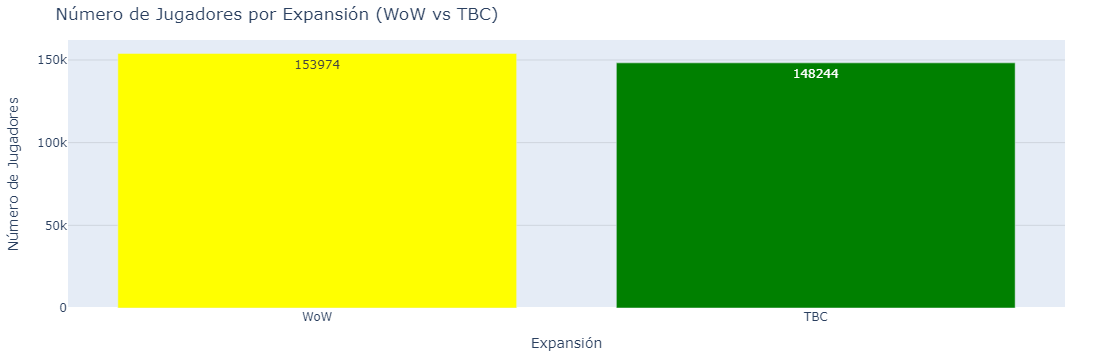

In [85]:
filtered_locations_wow = locations[locations['Game_Version'] == 'WoW']
filtered_locations_tbc = locations[locations['Game_Version'] == 'TBC']

filtered_wowah_data_wow = wowah_data[wowah_data['zone'].isin(filtered_locations_wow['Location_Name'])]
filtered_wowah_data_tbc = wowah_data[wowah_data['zone'].isin(filtered_locations_tbc['Location_Name'])]

merged_filtered_data_wow = pd.merge(filtered_wowah_data_wow, filtered_locations_wow, left_on='zone', right_on='Location_Name', how='left')
merged_filtered_data_tbc = pd.merge(filtered_wowah_data_tbc, filtered_locations_tbc, left_on='zone', right_on='Location_Name', how='left')

expansion_counts = {
    'WoW': len(merged_filtered_data_wow),
    'TBC': len(merged_filtered_data_tbc)
}

fig = go.Figure(data=[go.Bar(
    x=list(expansion_counts.keys()),
    y=list(expansion_counts.values()),
    marker_color=['yellow', 'green'],  # Colores para cada expansión
    text=[f'{count}' for count in expansion_counts.values()],
    textposition='auto'
)])

fig.update_layout(
    title='Número de Jugadores por Expansión (WoW vs TBC)',
    xaxis_title='Expansión',
    yaxis_title='Número de Jugadores',
    xaxis=dict(tickvals=[0, 1], ticktext=['WoW', 'TBC']),
    yaxis=dict(showgrid=True, gridcolor='rgba(0,0,0,0.1)', gridwidth=1),
    margin=dict(l=40, r=40, t=40, b=40)
)

fig.show()

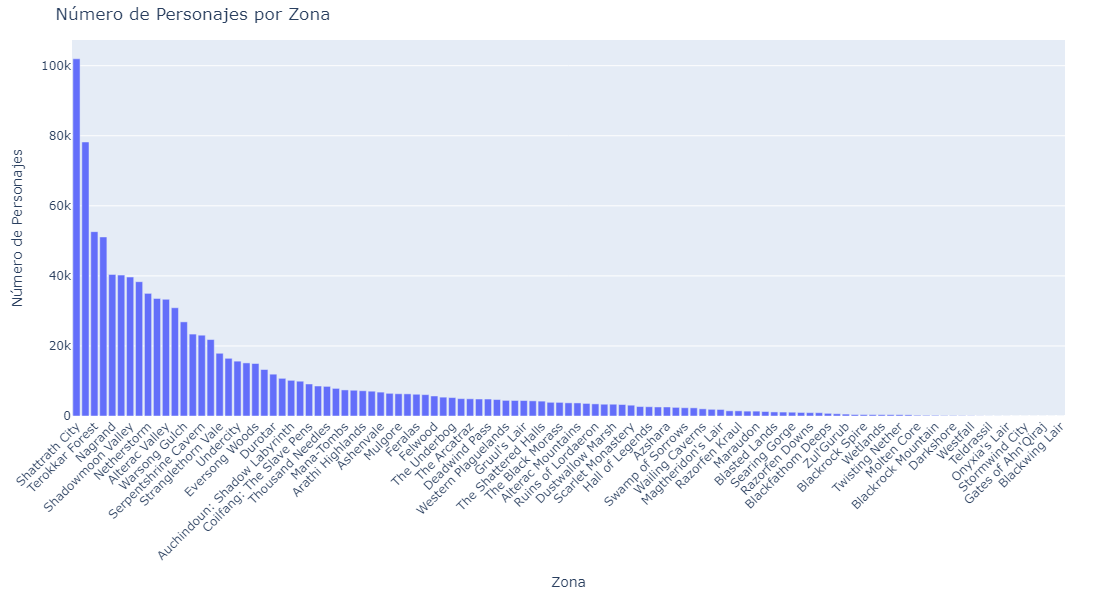

In [86]:
import plotly.express as px

# Contar el número de personajes en cada zona
zone_counts = wowah_data['zone'].value_counts().reset_index()
zone_counts.columns = ['zone', 'count']

# Crear gráfico de barras con Plotly
fig = px.bar(
    zone_counts,
    x='zone',
    y='count',
    title='Número de Personajes por Zona',
    labels={'zone': 'Zona', 'count': 'Número de Personajes'},
    height=600,
    width=1000
)

# Actualizar diseño para mejorar la visualización
fig.update_layout(
    xaxis_title='Zona',
    yaxis_title='Número de Personajes',
    xaxis=dict(tickangle=-45),  # Girar las etiquetas del eje x para mejor lectura
    margin=dict(l=40, r=40, t=40, b=100)  # Ajustar los márgenes para una mejor presentación
)

fig.show()

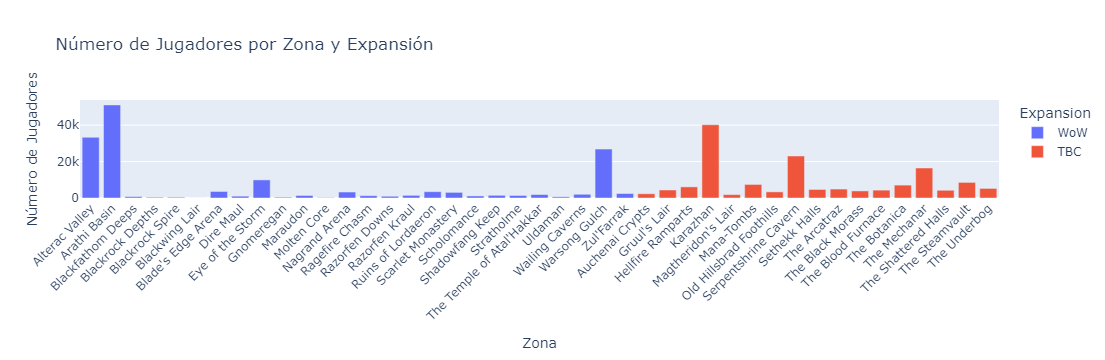

In [91]:
import plotly.express as px

# Filtrar por expansiones (WoW y TBC)
filtered_wowah_data_wow = wowah_data[wowah_data['zone'].isin(locations[locations['Game_Version'] == 'WoW']['Location_Name'])]
filtered_wowah_data_tbc = wowah_data[wowah_data['zone'].isin(locations[locations['Game_Version'] == 'TBC']['Location_Name'])]

# Contar jugadores por expansión y zona
expansion_zone_counts = pd.concat([
    filtered_wowah_data_wow.assign(Expansion='WoW'),
    filtered_wowah_data_tbc.assign(Expansion='TBC')
])

# Contar jugadores por zona y expansión
zone_expansion_counts = expansion_zone_counts.groupby(['zone', 'Expansion']).size().reset_index(name='count')

# Crear gráfico de barras
fig = px.bar(zone_expansion_counts, x='zone', y='count', color='Expansion',
             title='Número de Jugadores por Zona y Expansión',
             labels={'zone': 'Zona', 'count': 'Número de Jugadores'})
fig.update_layout(xaxis_title='Zona', yaxis_title='Número de Jugadores', xaxis_tickangle=-45)
fig.show()